# Random Walks
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesta atividade iremos explorar através de experimentos computacionais algumas das principais
características de caminhadas aleatórias. Para isso, iremos gerar caminhadas aleatórias em uma ou duas dimensões e analisar algumas de suas propriedades através de ensembles, estatísticas e visualizações. O relatório está presente no final do notebook.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

1. (a) Escreva uma rotina para gerar caminhadas aleatórias de N passos em d (=1 ou 2) dimensões, com cada passo tendo comprimento uniformemente distribuído
no intervalo (-1/2, 1/2) em cada dimensão. (Primeiro, gere os passos como um
array N x d e, então, faça uma soma cumulativa.) Faça um gráfico de Xt por t
para poucas caminhadas de 10.000 passos, onde Xt é a posição do caminhante
após t passos

In [24]:
def generate_random_walk(N, d):
  random_walk = np.random.rand(N, d)
  random_walk -= 0.5
  cum_sum = np.cumsum(random_walk, axis=0)
  return cum_sum

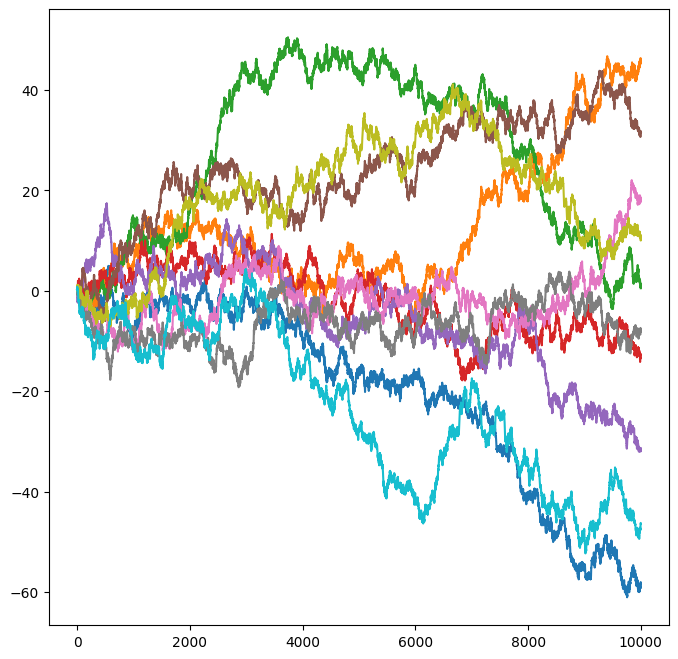

In [25]:
np.random.seed(42)
plt.figure(figsize=(8,8))

for i in range(10):
  random_walk = generate_random_walk(10000, 1)
  plt.plot(random_walk)

1. (b) Faça um gráfico de x por y para poucas caminhadas aleatórias bidimensionais
com N = 10, 1.000, e 100.000 (tente manter a razão de aspecto do gráfico XY em
um.) Se você multiplicar o número de passo por 100, a distância final da
caminhada aumenta por cerca de 10 vezes?

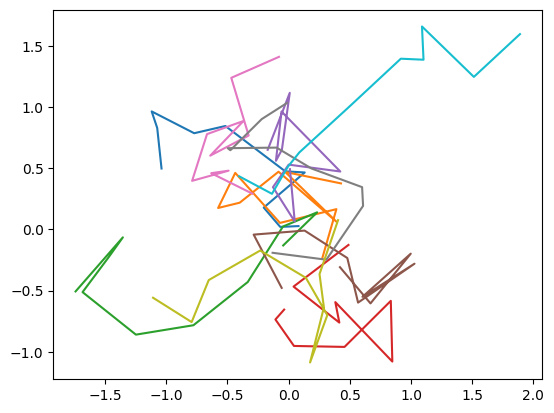

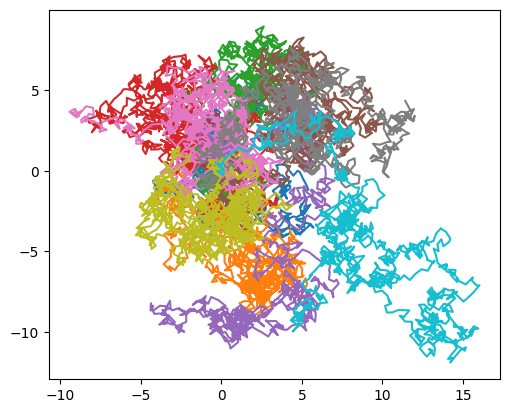

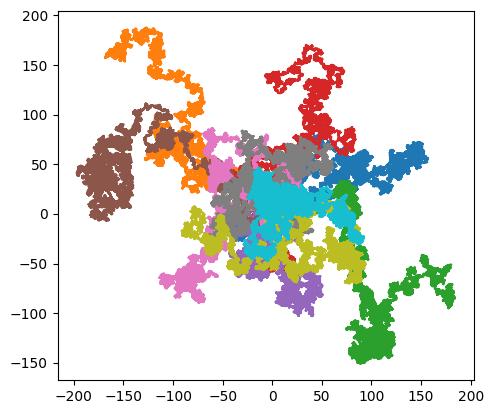

In [26]:
for i in range(3):
  fig, ax = plt.subplots()
  ax.set_aspect('equal')
  for j in range(10):
    random_walk = generate_random_walk(10 * (100 ** i), 2)
    ax.plot(random_walk[:,0], random_walk[:,1])


2. Escreva uma rotina para determinar os pontos finais de W caminhadas aleatórias
com N passos cada em d=2 dimensões. Faça um gráfico de dispersão das
coordenadas finais de 10.000 caminhadas aleatórias com N=1 e 10, superpostos no
mesmo gráfico. Perceba que as caminhadas longas estão distribuídas em um
padrão simétrico e circular, enquanto as caminhadas de um único passo têm uma
distribuição de probabilidades quadrada.

In [27]:
def get_final_points(W, N, d):
  final_points = []
  
  for _ in range(W):
    random_walk = generate_random_walk(N, d)
    final_points.append(random_walk[-1])
  
  final_points = np.array(final_points)

  return final_points

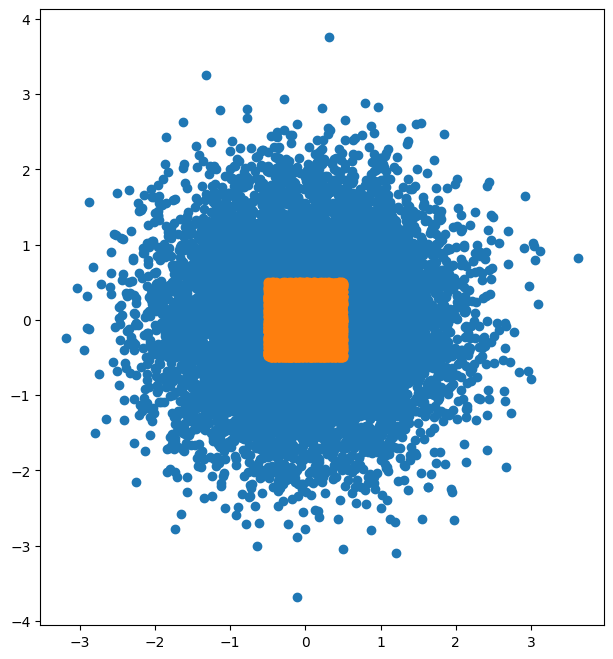

In [28]:
final_points = get_final_points(10000, 1, 2)
final_points10 = get_final_points(10000, 10, 2)

plt.figure(figsize=(8,8))
plt.scatter(final_points10[:, 0], final_points10[:, 1])
plt.scatter(final_points[:, 0], final_points[:, 1])
ax = plt.gca()
ax.set_aspect('equal')

(c) Calcule o desvio quadrático médio (RMS), a para passos uniformemente distribuidos
no intervalo (-1/2, 1/2) em uma dimensão. Escreva uma rotina que plota um histograma
dos pontos finais de W caminhadas aleatórias com N passos e 50 caixas (bins), junto com
a previsão da equação acima para x no intervalo (−3 * sigma, 3 * sigma). Faça um histograma com
W=10.000 e N=1, 2, 3 e 5. Quão rápido a distribuição Gaussiana se torna uma boa
aproximação para uma caminhada aleatória?

In [58]:
def plot_histogram(W, N, d):
  final_points = get_final_points(W, N, d)
  sigma = np.std(final_points)
  rms = sigma / np.sqrt(N)
  x = np.linspace(-3 * sigma, 3 * sigma, 100)
  gaussian = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x**2) / (2 * sigma**2))
  plt.hist(final_points, bins=50, density=True)
  plt.plot(x, gaussian, color='red', linewidth=3)
  plt.title(f'N = {N}, rms = {rms:.4f}')
  plt.show()

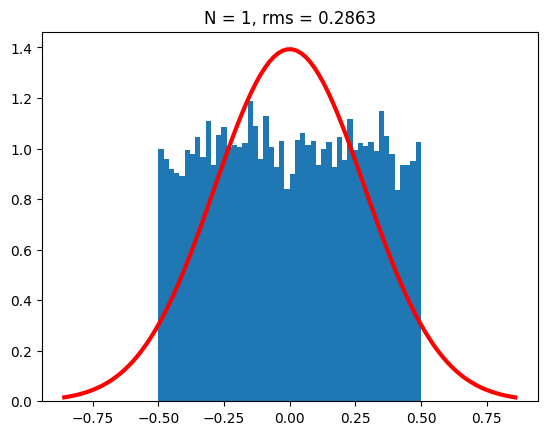

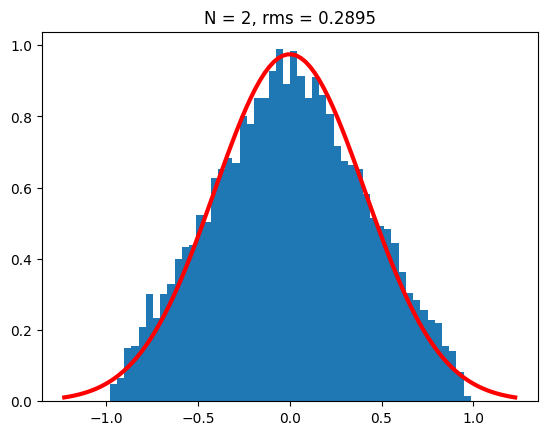

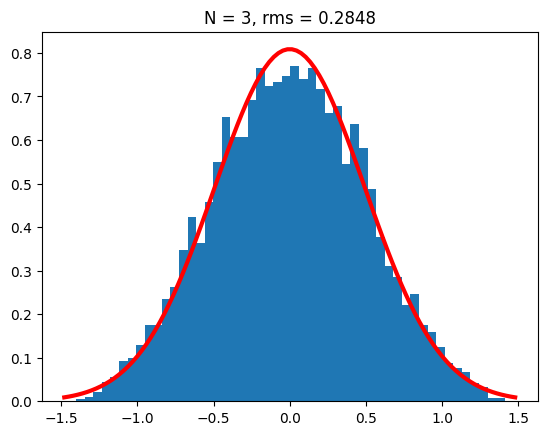

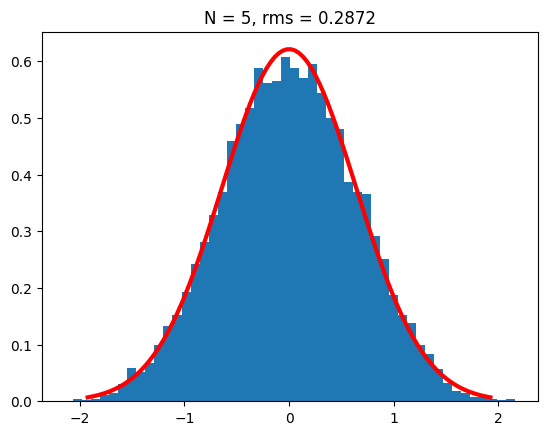

In [61]:
plot_histogram(10000, 1, 1)
plot_histogram(10000, 2, 1)
plot_histogram(10000, 3, 1)
plot_histogram(10000, 5, 1)

# Relatório

1. (a) Nessa questão, foi criada uma função que gera caminhadas aleatórias de N passos em d dimensões. A função recebe como parâmetros o número de passos e o número de dimensões. Primeiro, é criado um array de tamanho N x d, onde cada elemento é um número aleatório entre -1/2 e 1/2. Em seguida, é feita a soma cumulativa dos elementos do array, gerando assim a caminhada aleatória. Por fim, é feito um gráfico de Xt por t para poucas caminhadas de 10.000 passos, onde Xt é a posição do caminhante após t passos. É possível observar que a posição do caminhante após os 10000 passos é próxima de zero, o que é esperado já que a caminhada é aleatória e os passos são uniformemente distribuídos no intervalo (-1/2, 1/2) em cada dimensão.

    (b) Nessa questão, foi feito um gráfico de x por y para 10 caminhadas aleatórias bidimensionais com N = 10, 1.000, e 100.000. É possível observar que a distância final da caminhada aumenta por cerca de 10 vezes quando o número de passos é multiplicado por 100.

2. Nessa questão, foi criada uma função que determina os pontos finais de W caminhadas aleatórias com N passos cada em d=2 dimensões. A função recebe como parâmetros o número de passos, o número de caminhadas e o número de dimensões e retorna um array com os pontos finais. Então, foi gerado um gráfico de dispersão das coordenadas finais de 10.000 caminhadas aleatórias com N=1 e 10, superpostos no mesmo gráfico. É possível observar que as caminhadas longas estão distribuídas em um padrão simétrico e circular, enquanto as caminhadas de um único passo têm uma distribuição de probabilidades quadrada. Isso ocorre porque é mais provável que o caminhante fique próximo de onde começou do que que ele se afaste muito, já que os passos são uniformemente distribuídos no intervalo (-1/2, 1/2) em cada dimensão. Além disso, o padrão circular é esperado já que o caminhante pode se mover em qualquer direção mas tendendo ao centro enquanto a distribuição quadrada é esperada pelos mesmos motivos mas limitado ao maior passo possível em valor absoluto de x e y que é 1/2.

3. (c) Nessa questão, foi calculado o desvio quadrático médio (RMS) para passos uniformemente distribuidos no intervalo (-1/2, 1/2) em uma dimensão. Em seguida, foi implementada uma função que plota um histograma dos pontos finais de W caminhadas aleatórias com N passos, junto com a previsão da distribuição Gaussiana. Os histogramas foram feitos com W = 10000 e N = 1, 2, 3 e 5. É possível observar que a distribuição Gaussiana se torna uma boa aproximação para uma caminhada aleatória quando o número de passos aumenta, já que devido ao Teorema do Limite Central, que diz que a soma de variáveis aleatórias independentes e identicamente distribuídas tende a uma distribuição normal. Como os passos são uniformemente distribuídos no intervalo (-1/2, 1/2) em cada dimensão, eles são independentes e identicamente distribuídos, o que explica a aproximação da distribuição Gaussiana. Foi possível perceber que, a partir de N=3, a distribuição Gaussiana já é começa a se tornar uma boa aproximação para a distribuição dos pontos finais e que o desvio quadrático médio (RMS) girou em torno de 0.28.